## AI Serving 프로젝트 Yolo v5 모델 학습
- Dataset : Roboflow의 Hard Hat Worker Dataset (안전모 데이터셋) 사용
- Model : Open Source Object Detection Yolo v5 
- 안전모 데이터와 Model을 Colab 로드 후 학습

### 1. 안전모 데이터셋, Yolo v5 Github Clone 해오기

In [ ]:
!curl -L "https://public.roboflow.com/ds/MICm9KRqnw?key=gDVT8T8DxN" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5


/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13476, done.
remote: Total 13476 (delta 0), reused 0 (delta 0), pack-reused 13476
Receiving objects: 100% (13476/13476), 12.05 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (9405/9405), done.


In [ ]:
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cat /content/datasets/data.yaml

cat: /content/datasets/data.yaml: No such file or directory


### 2. Datasets 셋팅하기 
- Datasets 폴더를 만들고 그 안으로 다운로드 받은 데이터들을 옮겨주세요~~

In [ ]:
%cd /
from glob import glob

img_list = glob('/content/datasets/train/images/*.jpg')
print(len(img_list))

from sklearn.model_selection import train_test_split
train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2022)
print(len(train_img_list), len(val_img_list))


/
5269
4215 1054


In [ ]:
with open('/content/datasets/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/datasets/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')


In [ ]:
import yaml

with open('/content/datasets/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/datasets/train.txt'
data['val'] = '/content/datasets/val.txt'

with open('/content/datasets/data.yaml', 'w') as f:
  yaml.dump(data, f)
print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 3, 'names': ['head', 'helmet', 'person']}
{'train': '/content/datasets/train.txt', 'val': '/content/datasets/val.txt', 'nc': 3, 'names': ['head', 'helmet', 'person']}


### 3. Yolo v5 학습하기

In [ ]:
# Epoch 이나 yolov5s.py <- 요 부분을 yolov5l이나 yolov5m 등으로 바꿔가면서 실행 해주세요~~
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 1 --data /content/datasets/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name helmet_v5s_result

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/datasets/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=helmet_v5s_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-201-g9a7f289 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

### 4. 학습된 모델 테스트 해보기

In [ ]:
# %cd /content/yolov5/
from IPython.display import Image
import os

val_img_path = val_img_list[0]
!python detect.py --weights /content/yolov5/runs/train/helmet_v5s_result/weights/best.pt --img 416 --conf 0.25 --source "{val_img_path}"


detect: weights=['/content/yolov5/runs/train/helmet_v5s_result/weights/best.pt'], source=/content/datasets/train/images/004148_jpg.rf.0846f5ae3eebce02447910f914e5ef05.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-201-g9a7f289 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/datasets/train/images/004148_jpg.rf.0846f5ae3eebce02447910f914e5ef05.jpg: 416x416 3 helmets, Done. (0.022s)
Speed: 0.3ms pre-process, 22.3ms inference, 1.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2


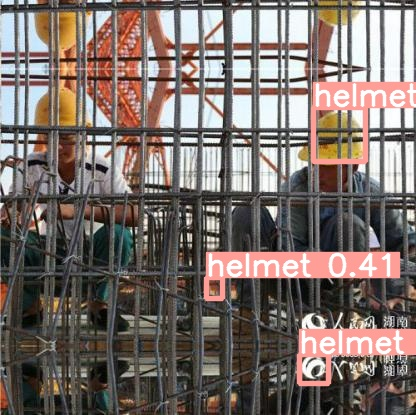

In [ ]:
Image(os.path.join('/content/yolov5/runs/detect/exp2', os.path.basename(val_img_path)))
